In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!ls

 tox21_10k_data_consensus_results_f1_opt.csv
 tox21_10k_data_consensus_results_inc_rdkit_desc.csv
 tox21_10k_data_consensus_results_no_bayes.csv
 tox21_10k_data_consensus_results_tuning.csv
 tox21_10k_data_consensus_results_tuning_f1_opt.csv
 tox21_10k_data_hitrate.csv
 tox21_10k_data_results.csv
 tox21_10k_data_results_f1_opt.csv
 tox21_10k_data_results_inc_rdkit_desc.csv
 tox21_10k_data_summary.csv
 tox21_10k_data_summary_f1_opt.csv
 tox21_10k_data_summary_inc_rdkit_desc.csv
 tox21_10k_data_summary_inc_test.csv
 tox21_10k_data_summary_inc_test_with_ba_opt.csv
 tox21_10k_data_tuning_results.csv
 tox21_10k_data_tuning_results_f1_opt.csv
 tox21_10k_data_tuning_summary.csv
'Tox21 Analysis.ipynb'
 tox21_challenge_results.csv
'Tox21 Detailed Analysis.ipynb'
'Tox21 Multi Group Analysis.ipynb'
 tox21_reference_search_results.csv
 tox21_reference_search_results_f1_opt.csv
 tox21_reference_search_results_not_tuned_f1_opt.csv
 tox21_reference_search_results_parallel2.csv
 tox21_reference_search

In [3]:

files_and_labels = [('tox21_10k_data_summary_inc_rdkit_desc.csv', 'Best'), 
                    ('tox21_10k_data_consensus_results_inc_rdkit_desc.csv', "Consensus")]
files_and_labels = [('tox21_10k_data_summary_inc_test_with_ba_opt.csv', 'Best'), 
                    ('tox21_10k_data_consensus_results_no_bayes.csv', "Consensus")]
files_and_labels = [('tox21_10k_data_tuning_summary.csv', 'Best'), 
                    ('tox21_10k_data_consensus_results_tuning.csv', "Consensus")]
files_and_labels = [('tox21_10k_data_tuning_summary.csv', 'Tuning Best'), 
                    ('tox21_10k_data_consensus_results_tuning.csv', "Tuning Consensus"),
                    ('tox21_10k_data_summary_inc_test_with_ba_opt.csv', 'Best'), 
                    ('tox21_10k_data_consensus_results_no_bayes.csv', "Consensus")]
def create_table(file, label):
    df = pd.read_csv(file)
    if 'Dataset' in df.columns:
        df = df[df['Dataset'] == 'Score']
        df = df[['ToxAssay', 'RocAUC', 'BA']]
        df.rename(columns={'ToxAssay': 'ToxField'}, inplace=True)
    df['label'] = label
    return df
    
result_tables = [create_table(f, l) for f, l in files_and_labels]
results = pd.concat(result_tables, ignore_index=True)



In [4]:
results

,ToxField,RocAUC,BA,label
0,NR-AR,0.751451,0.631528,Tuning Best
1,NR-AhR,0.887910,0.761236,Tuning Best
2,NR-AR-LBD,0.643272,0.566593,Tuning Best
3,NR-ER,0.730811,0.685058,Tuning Best
4,NR-ER-LBD,0.789271,0.644433,Tuning Best
5,NR-Aromatase,0.815685,0.622820,Tuning Best
6,NR-PPAR-gamma,0.765695,0.553571,Tuning Best
7,SR-ARE,0.762994,0.681274,Tuning Best
8,SR-ATAD5,0.747634,0.684866,Tuning Best
9,SR-HSE,0.796638,0.571970,Tuning Best


In [5]:
results.groupby(['label'])['RocAUC'].mean()

label
Best                0.806938
Consensus           0.823499
Tuning Best         0.785955
Tuning Consensus    0.823891
Name: RocAUC, dtype: float64

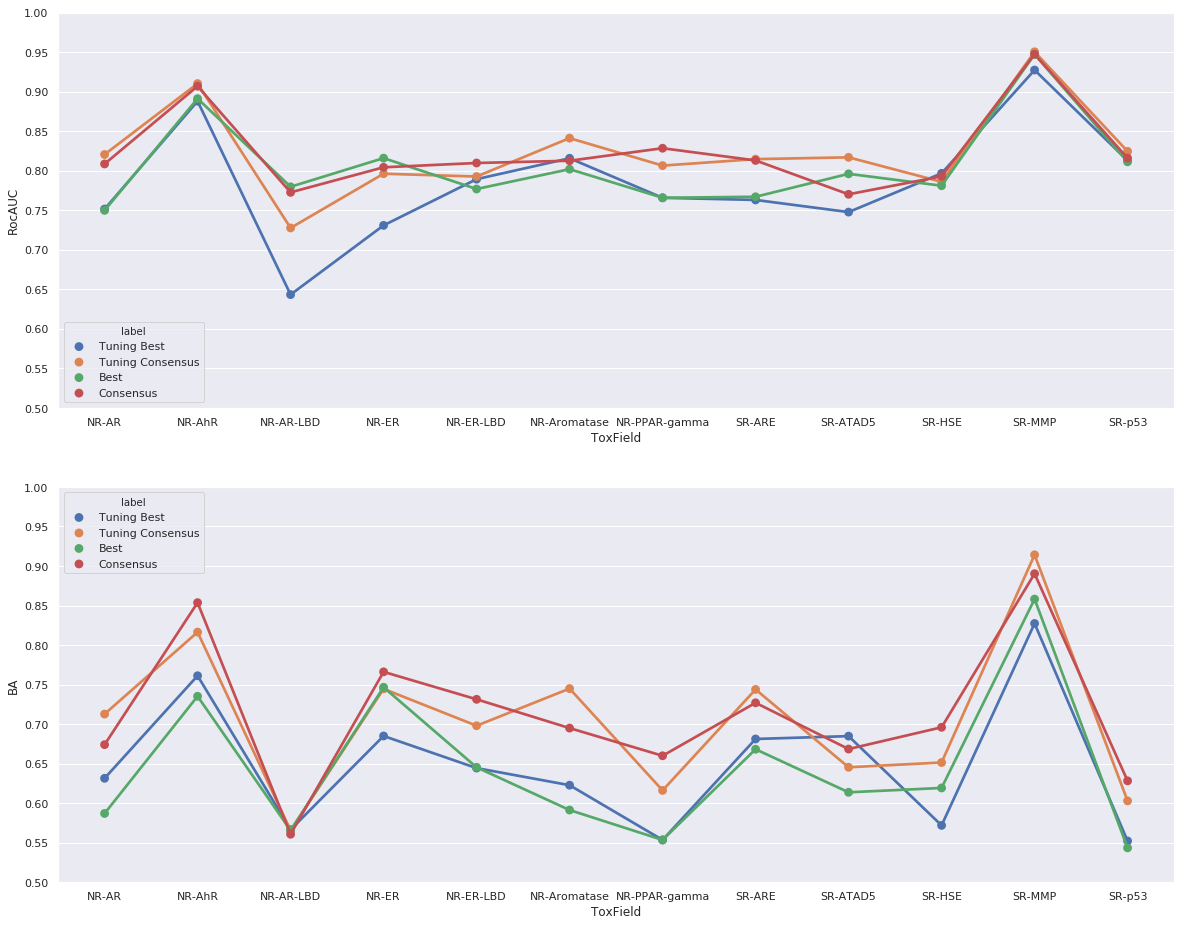

In [6]:

y_ticks = np.linspace(0.5, 1, num=11)
#sns.set_style("whitegrid")
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax = axes[0]
ax.set(ylim=(0.5,1.0))
ax.set(yticks=y_ticks)
sns.pointplot(x="ToxField", y="RocAUC", data=results, hue='label', ax=ax)
ax = axes[1]
ax.set(ylim=(0.5,1.0))
ax.set(yticks=y_ticks)
sns.pointplot(x="ToxField", y="BA", data=results, hue='label', ax=ax)

In [7]:
challenge_results = pd.read_csv('tox21_challenge_results.csv')
challenge_results.rename(columns={'AUC-ROC': 'RocAUC', 'Balanced Accuracy': 'BA', 'Team Name': 'label'}, inplace=True)
challenge_results['label']='Challenge'

#challenge_results


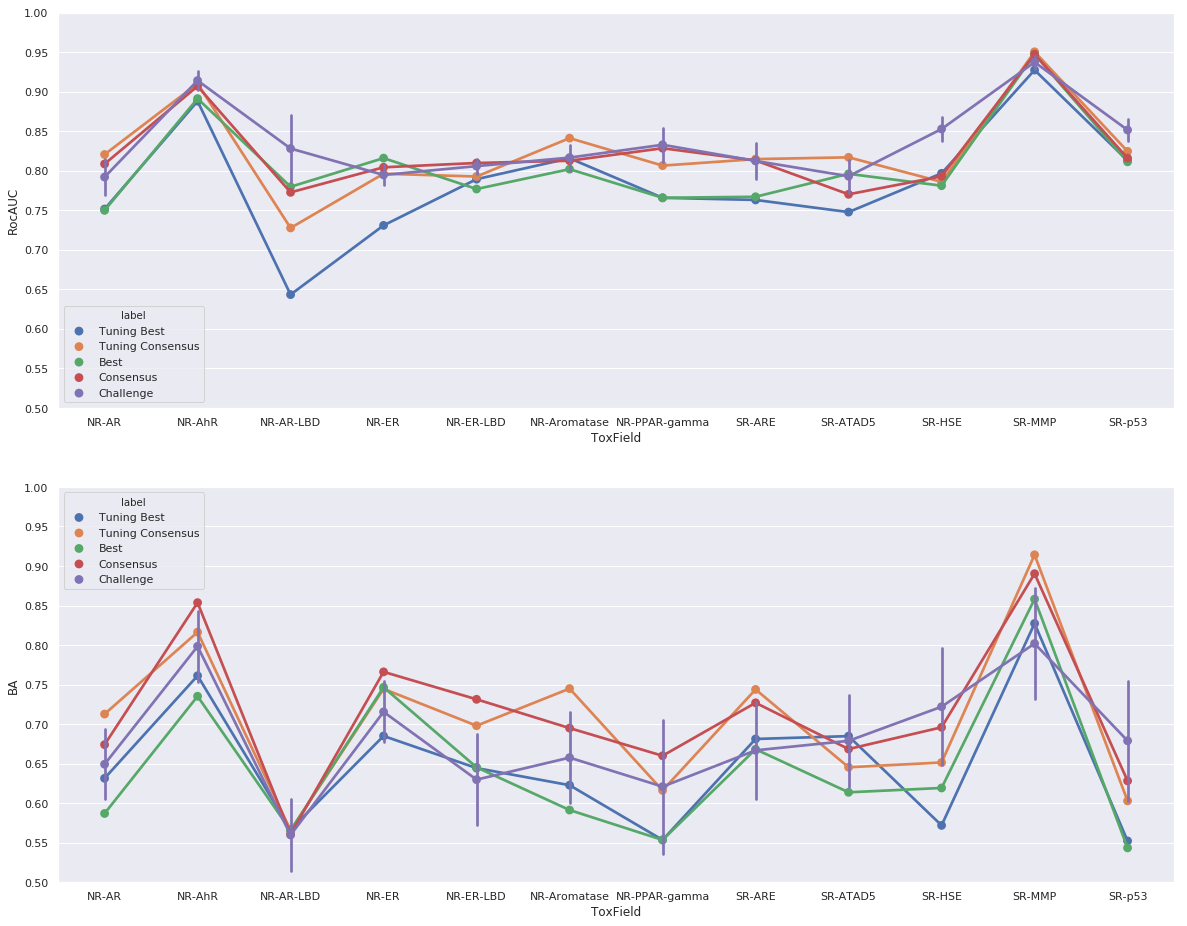

In [8]:
all_tables = result_tables
all_tables.append(challenge_results)
all_results = pd.concat(all_tables, ignore_index=True, sort=False)

y_ticks = np.linspace(0.5, 1, num=11)
#sns.set_style("whitegrid")
sns.set()
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax = axes[0]
ax.set(ylim=(0.5,1.0))
ax.set(yticks=y_ticks)
sns.pointplot(x="ToxField", y="RocAUC", data=all_results, ax=ax, ci='sd', hue='label')
ax = axes[1]
ax.set(ylim=(0.0,1.0))
ax.set(yticks=y_ticks)
ax.set(ylim=(0.5,1.0))
sns.pointplot(x="ToxField", y="BA", data=all_results, hue='label', ci='sd', ax=ax)

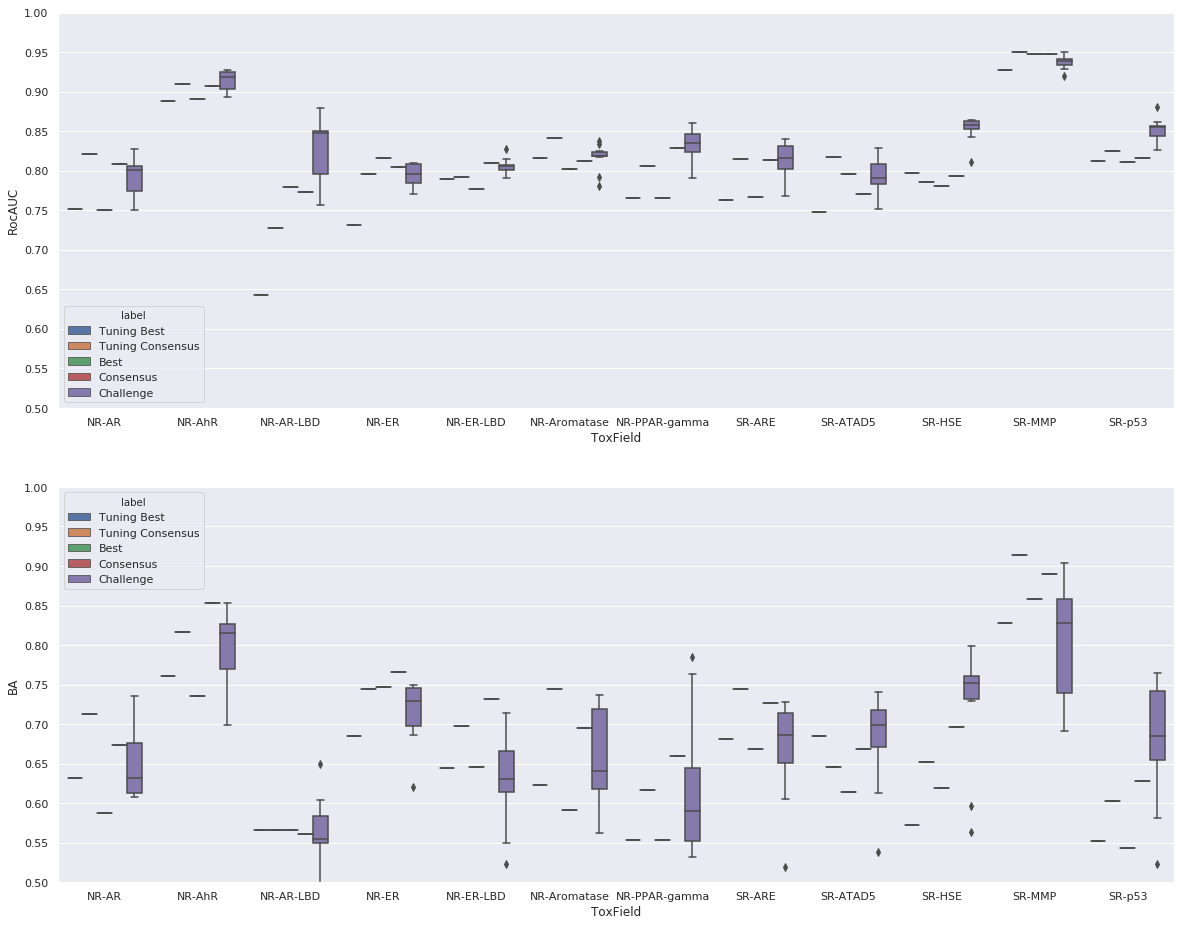

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 16))
ax = axes[0]
ax.set(ylim=(0.5,1.0))
ax.set(yticks=y_ticks)
sns.boxplot(x="ToxField", y="RocAUC", data=all_results, ax=ax, hue='label')
ax = axes[1]
ax.set(ylim=(0.0,1.0))
ax.set(yticks=y_ticks)
ax.set(ylim=(0.5,1.0))
sns.boxplot(x="ToxField", y="BA", data=all_results, hue='label', ax=ax)

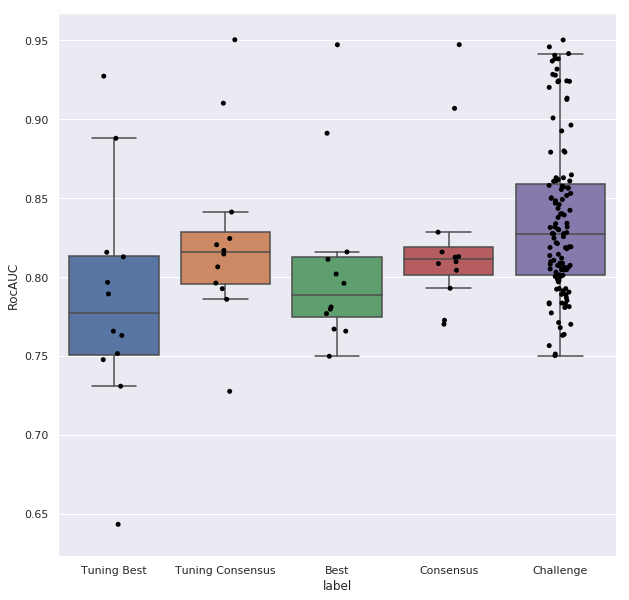

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.set(ylim=(0.5,1.0))
sns.stripplot(y="RocAUC", x="label", data=all_results, ax=axes, color='Black')
sns.boxplot(y="RocAUC", x="label", data=all_results, ax=axes, showfliers=False)

In [11]:
all_results.groupby(['label'])['RocAUC'].mean()

label
Best                0.806938
Challenge           0.835853
Consensus           0.823499
Tuning Best         0.785955
Tuning Consensus    0.823891
Name: RocAUC, dtype: float64

In [12]:
all_results.groupby(['label'])['RocAUC'].median()

label
Best                0.788509
Challenge           0.827398
Consensus           0.811145
Tuning Best         0.777483
Tuning Consensus    0.815747
Name: RocAUC, dtype: float64